<a href="https://colab.research.google.com/github/Seifcha/Breast_Cancer_Detection/blob/Modeling_KNN_SVM/breast_cancer_detection_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Detection: Data Preparation & Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


1. Business Understandig

2. Data Understandig

In [4]:
# Load the Wisconsin Diagnostic Breast Cancer dataset
df = pd.read_csv('/content/data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset shape: (569, 33)
Total samples: 569
Total features: 33

First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0

In [5]:
# Check for columns with all NaN values
print("\nColumns with all NaN values:")
nan_cols = df.columns[df.isna().all()].tolist()
print(nan_cols if nan_cols else "None")


Columns with all NaN values:
['Unnamed: 32']


In [6]:
# CHECK FOR MISSING VALUES

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df)
else:
    print("\n✓ No missing values found in the dataset")


Columns with missing values:
         Column  Missing_Count  Percentage
32  Unnamed: 32            569       100.0


In [7]:
# DATA INFORMATION

print("\nData types:")
print(df.dtypes.value_counts())

print("\nDetailed information:")
df.info()


Data types:
float64    31
int64       1
object      1
Name: count, dtype: int64

Detailed information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 n


Diagnosis Distribution:
Benign (B): 357 samples (62.74%)
Malignant (M): 212 samples (37.26%)

✓ Target variable encoded: M=1 (Malignant), B=0 (Benign)


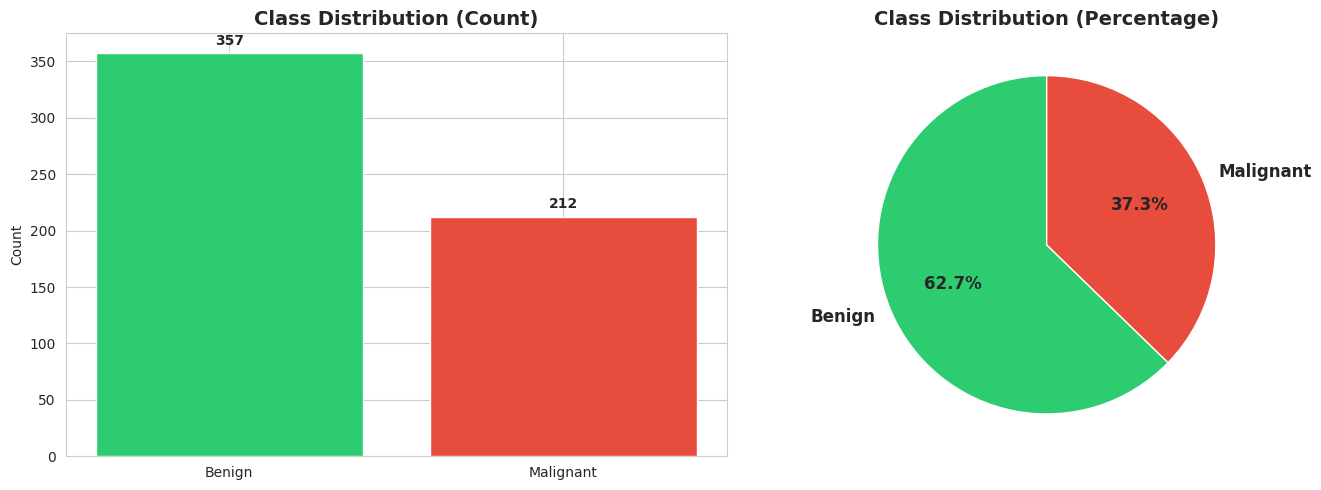

✓ Visualization saved as 'class_distribution.png'


In [8]:
# TARGET VARIABLE ANALYSIS

# Check diagnosis distribution
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_percentages = df['diagnosis'].value_counts(normalize=True) * 100

print("\nDiagnosis Distribution:")
print(f"Benign (B): {diagnosis_counts['B']} samples ({diagnosis_percentages['B']:.2f}%)")
print(f"Malignant (M): {diagnosis_counts['M']} samples ({diagnosis_percentages['M']:.2f}%)")

# Encode target variable: M (Malignant) = 1, B (Benign) = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("\n✓ Target variable encoded: M=1 (Malignant), B=0 (Benign)")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
diagnosis_labels = ['Benign', 'Malignant']
diagnosis_values = [diagnosis_counts['B'], diagnosis_counts['M']]
axes[0].bar(diagnosis_labels, diagnosis_values, color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
for i, v in enumerate(diagnosis_values):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(diagnosis_values, labels=diagnosis_labels, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved as 'class_distribution.png'")

In [9]:
# FEATURE CATEGORIZATION

# Categorize features as in the paper
mean_features = [col for col in df.columns if col.endswith('_mean')]
se_features = [col for col in df.columns if col.endswith('_se')]
worst_features = [col for col in df.columns if col.endswith('_worst')]

print(f"\nMean features (10): {len(mean_features)}")
print(mean_features)
print(f"\nStandard Error features (10): {len(se_features)}")
print(se_features)
print(f"\nWorst features (10): {len(worst_features)}")
print(worst_features)


Mean features (10): 10
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

Standard Error features (10): 10
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']

Worst features (10): 10
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [10]:
# STATISTICAL SUMMARY

# Separate features by diagnosis
benign = df[df['diagnosis'] == 0]
malignant = df[df['diagnosis'] == 1]

print("\nOverall Statistics:")
print(df.describe())

print("Statistics for Benign Cases:")
print(benign.describe())

print("Statistics for Malignant Cases:")
print(malignant.describe())


Overall Statistics:
                 id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813    


EXPLORATORY DATA ANALYSIS

[1/7] Creating distribution plots for mean features...


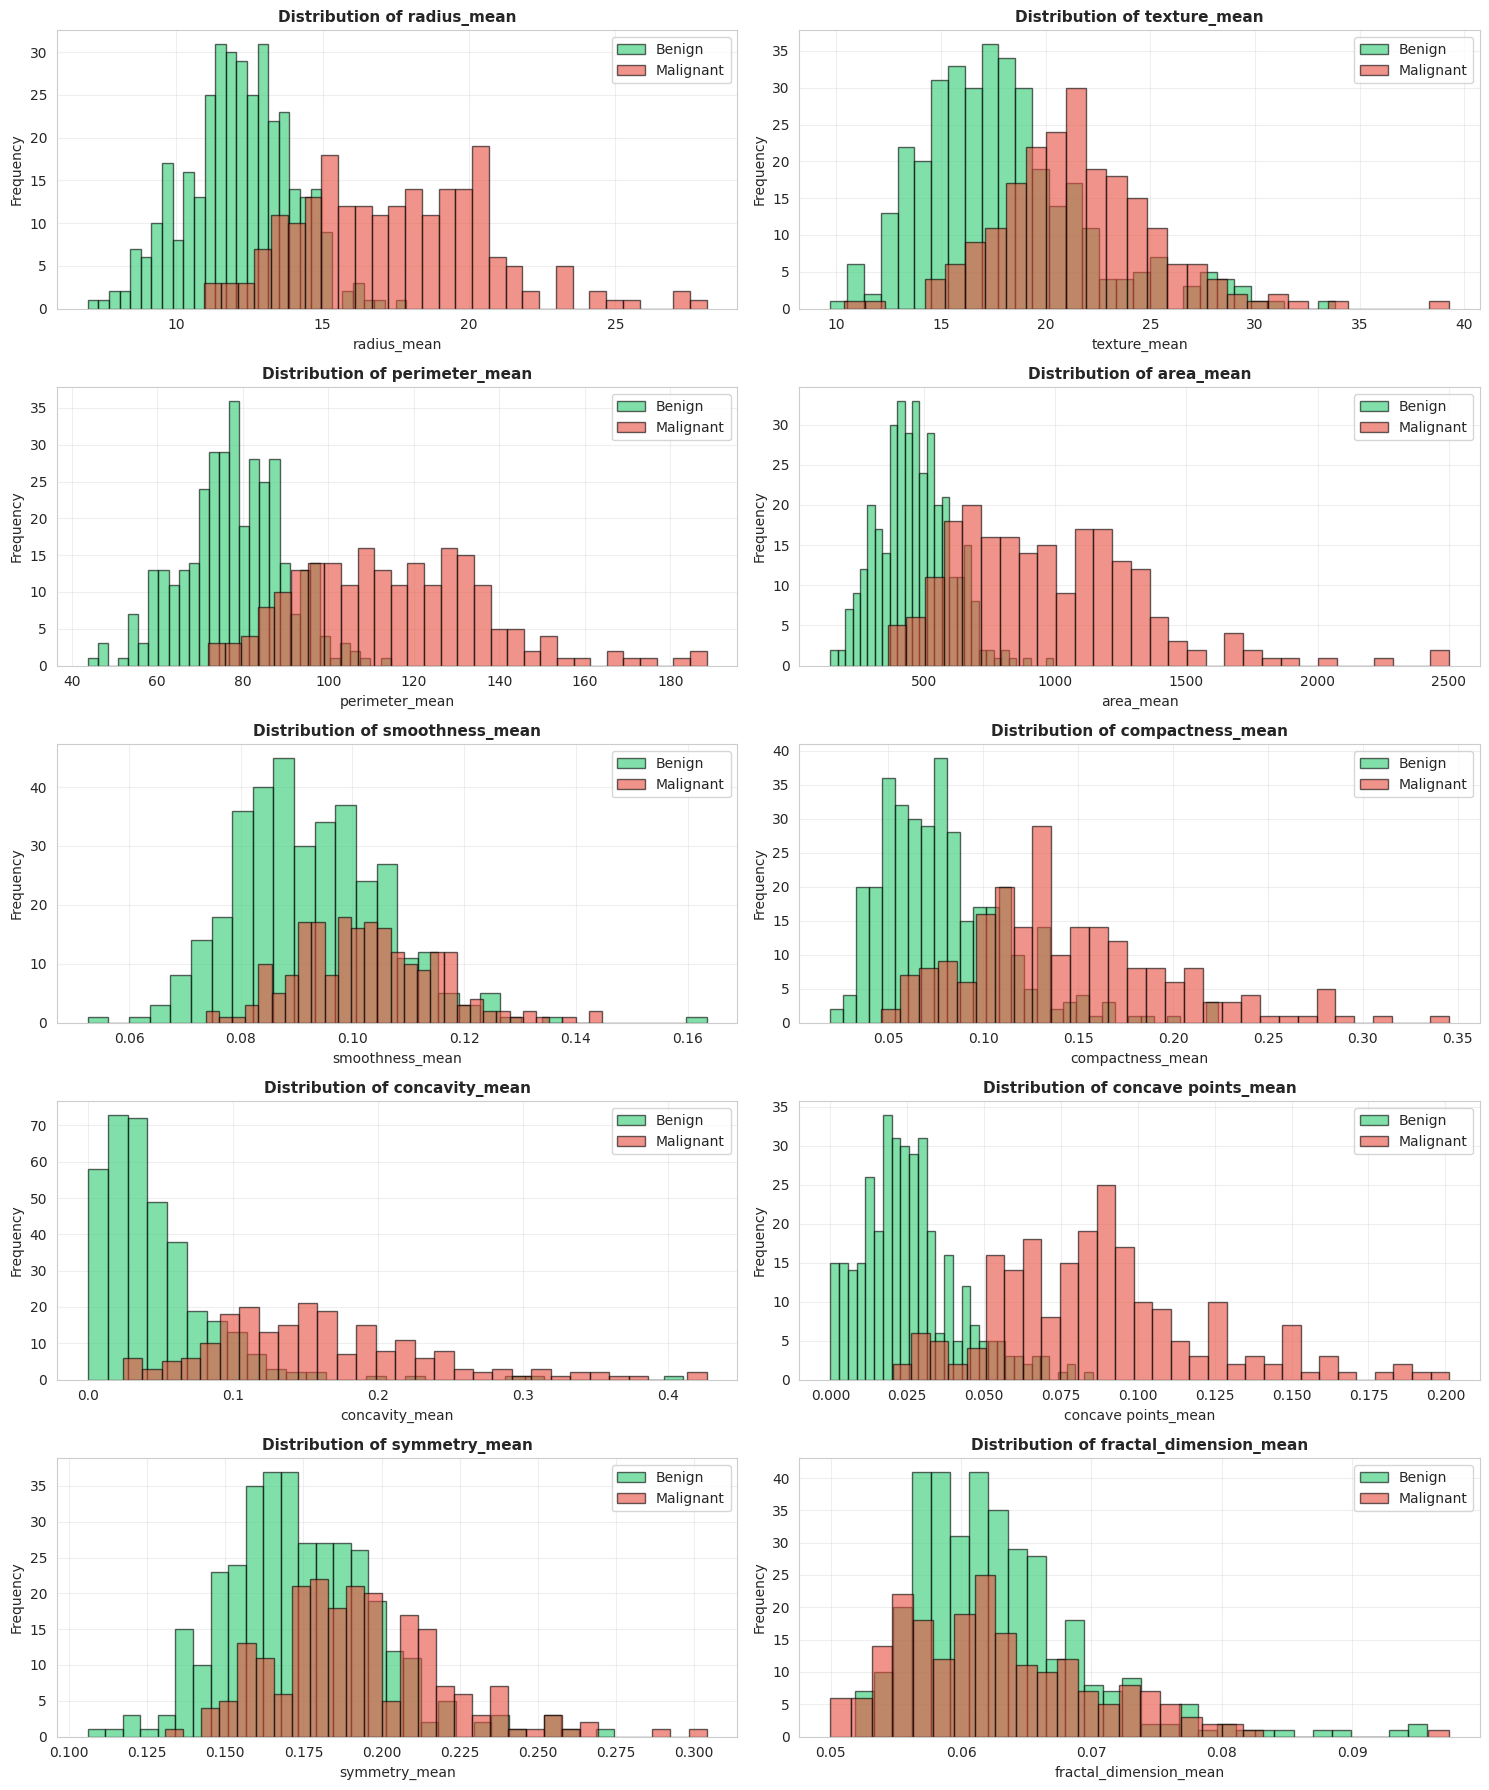

✓ Saved as 'mean_features_distribution.png'

[2/7] Creating box plots for mean features...


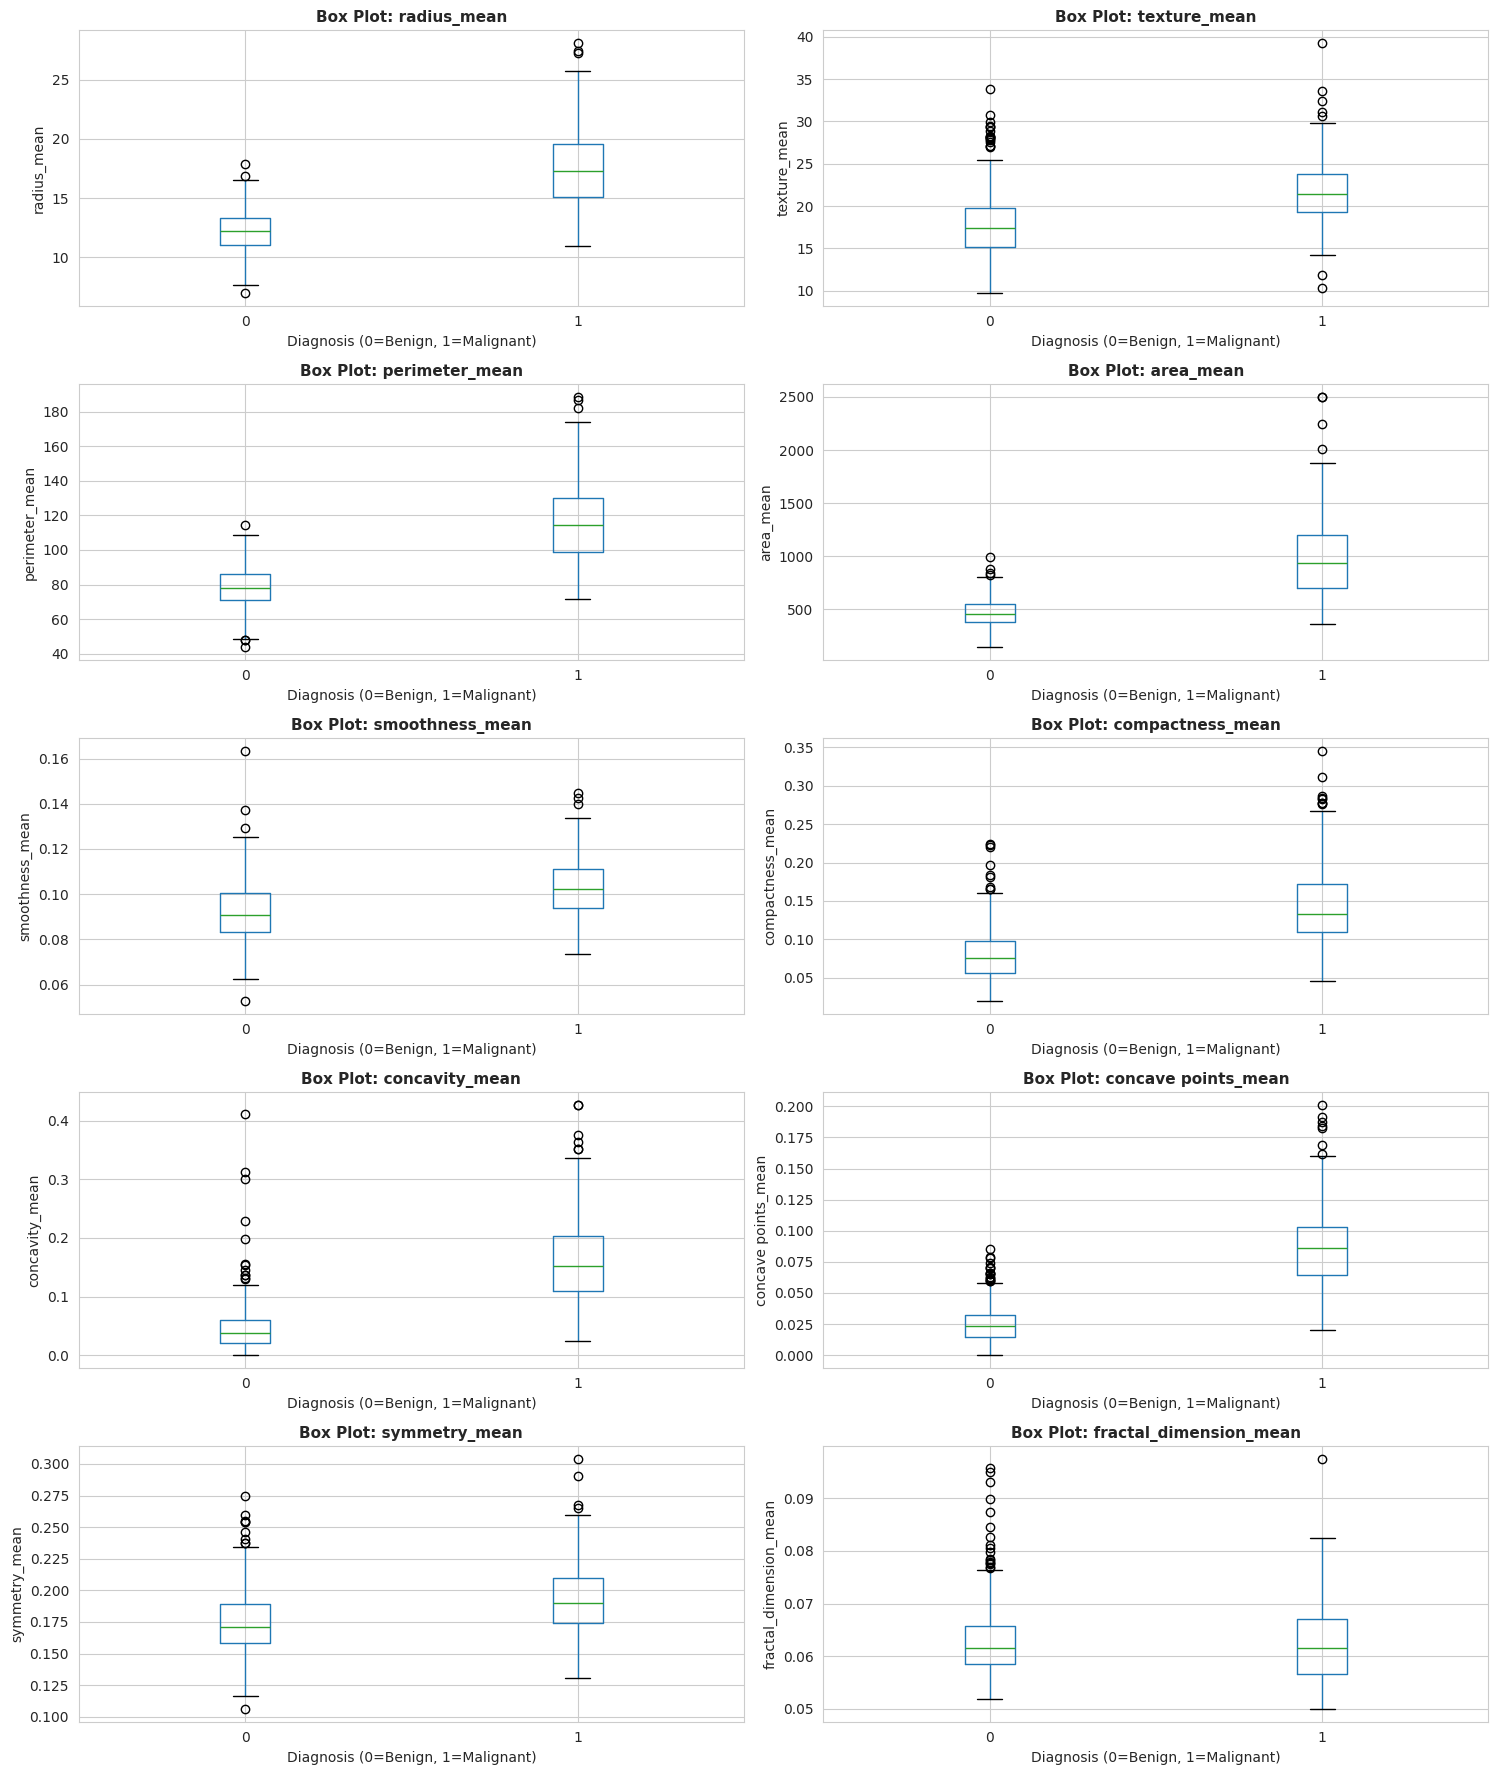

✓ Saved as 'mean_features_boxplot.png'

[3/7] Creating correlation matrix...


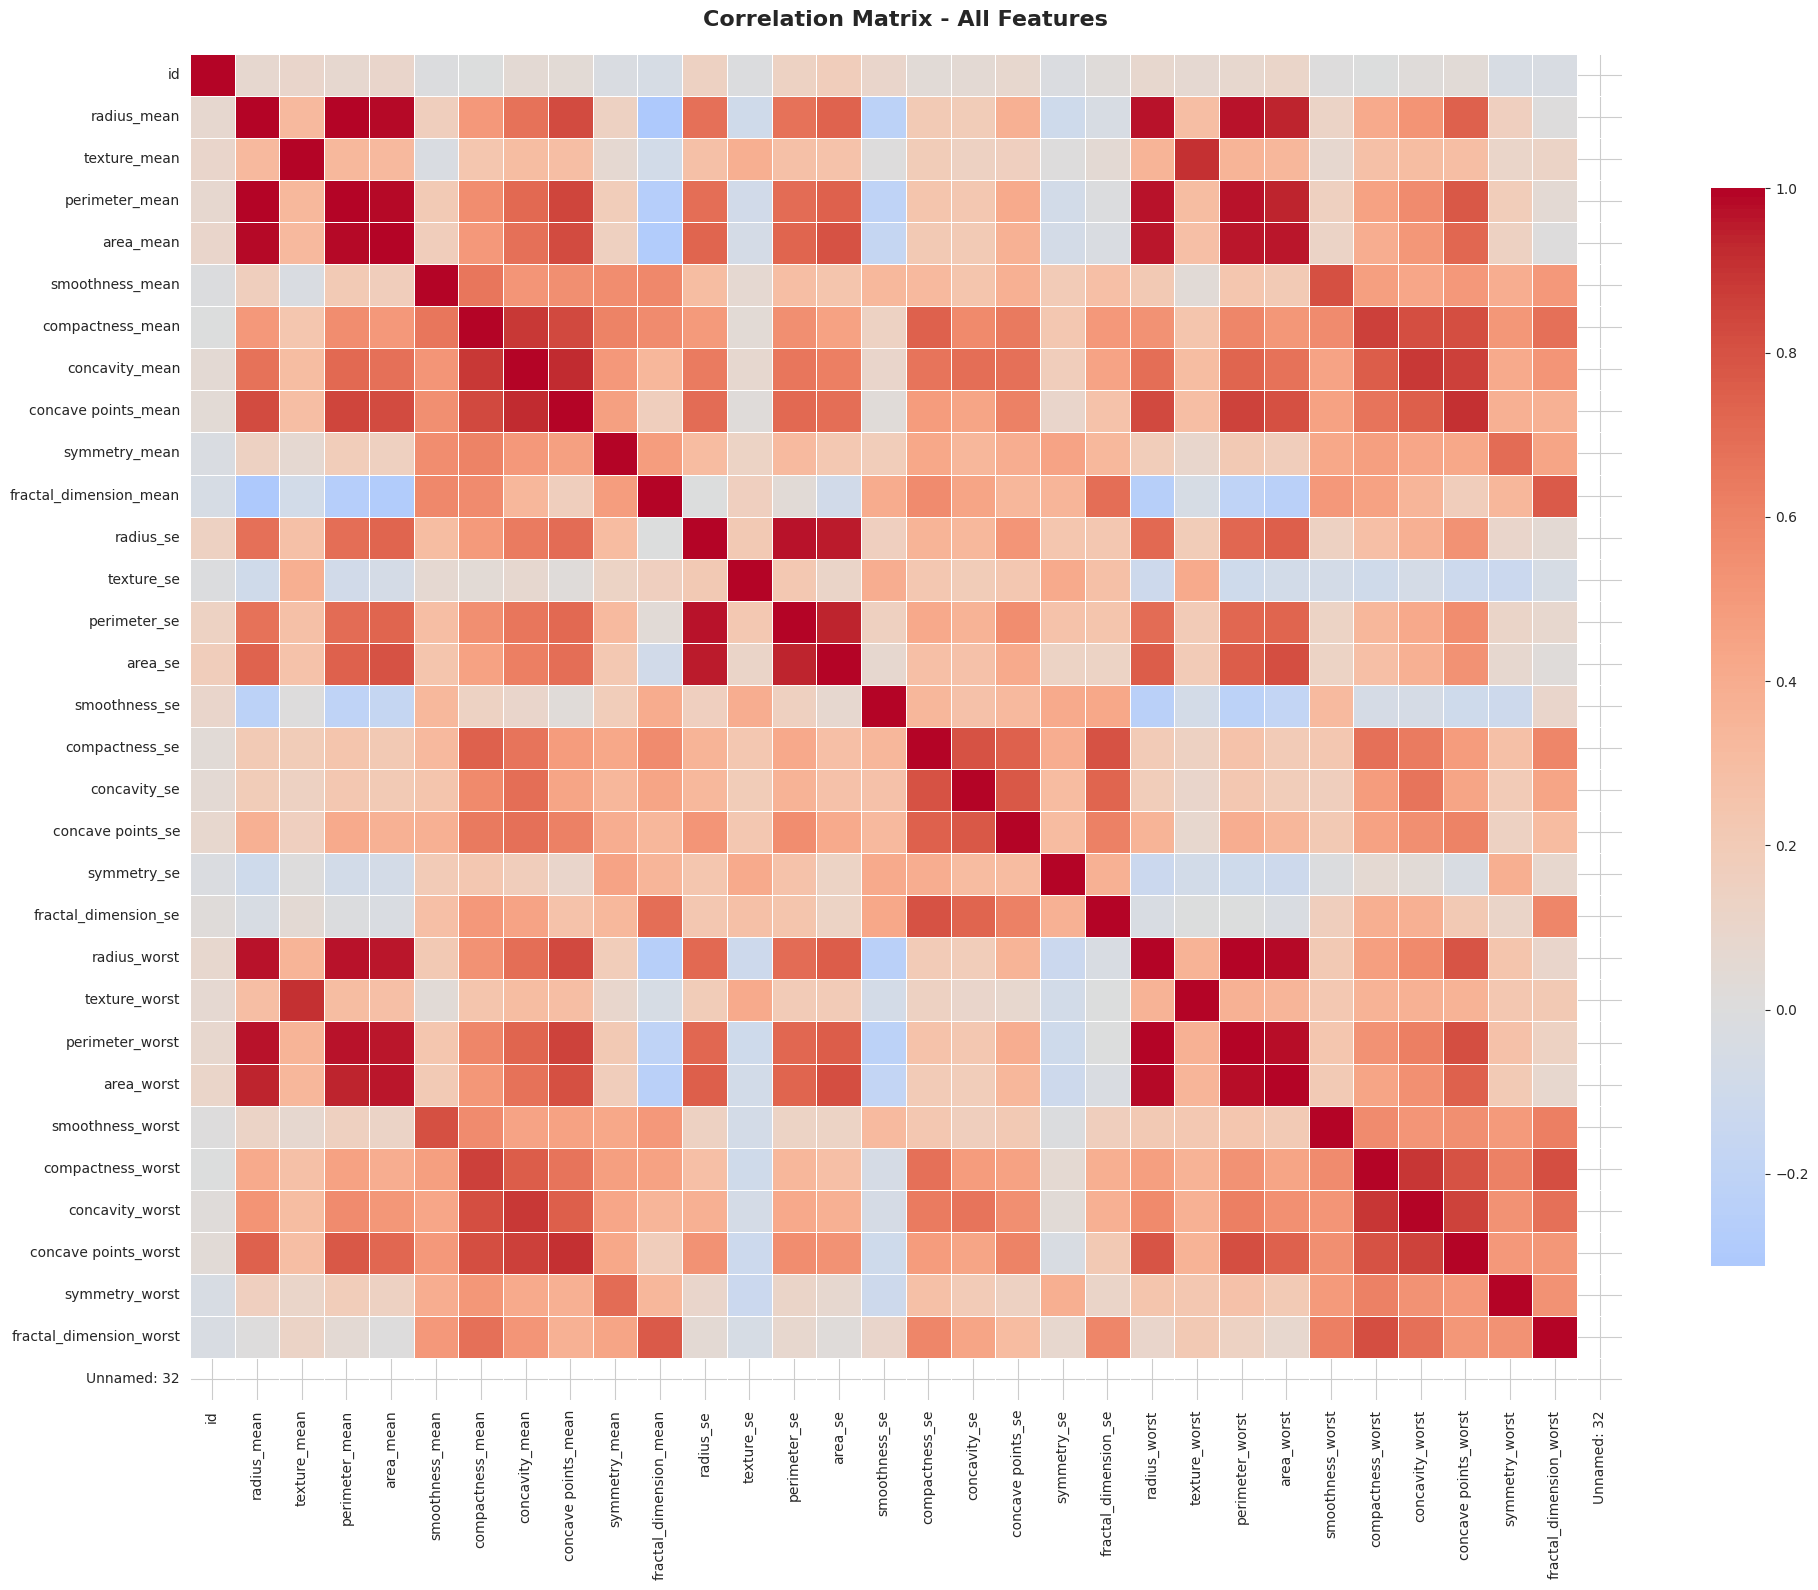

✓ Saved as 'correlation_matrix_full.png'

[4/7] Analyzing correlation with diagnosis...


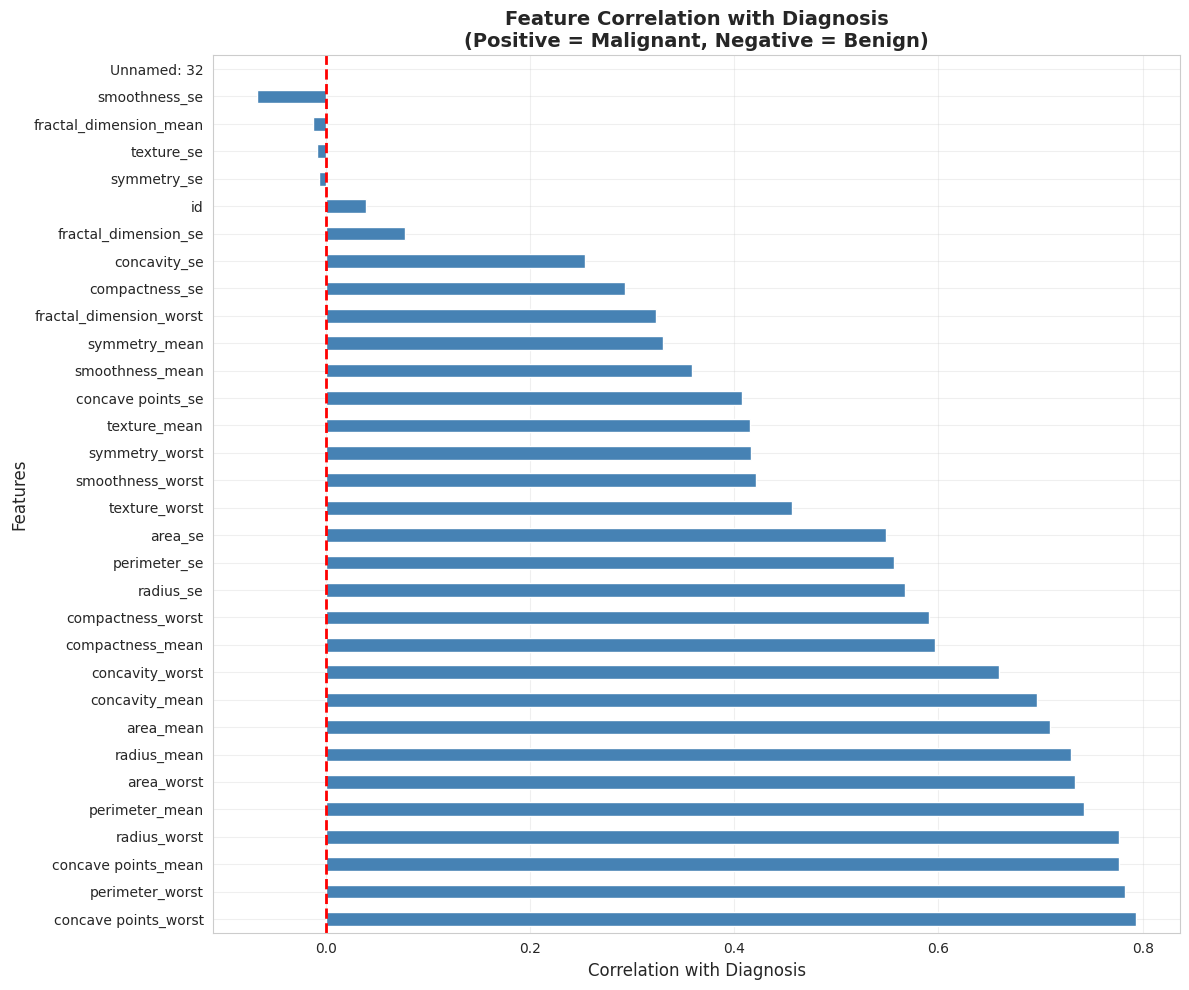

✓ Saved as 'correlation_with_diagnosis.png'

Top 10 features most correlated with Malignant diagnosis:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64

[5/7] Creating scatter plots for feature categories...


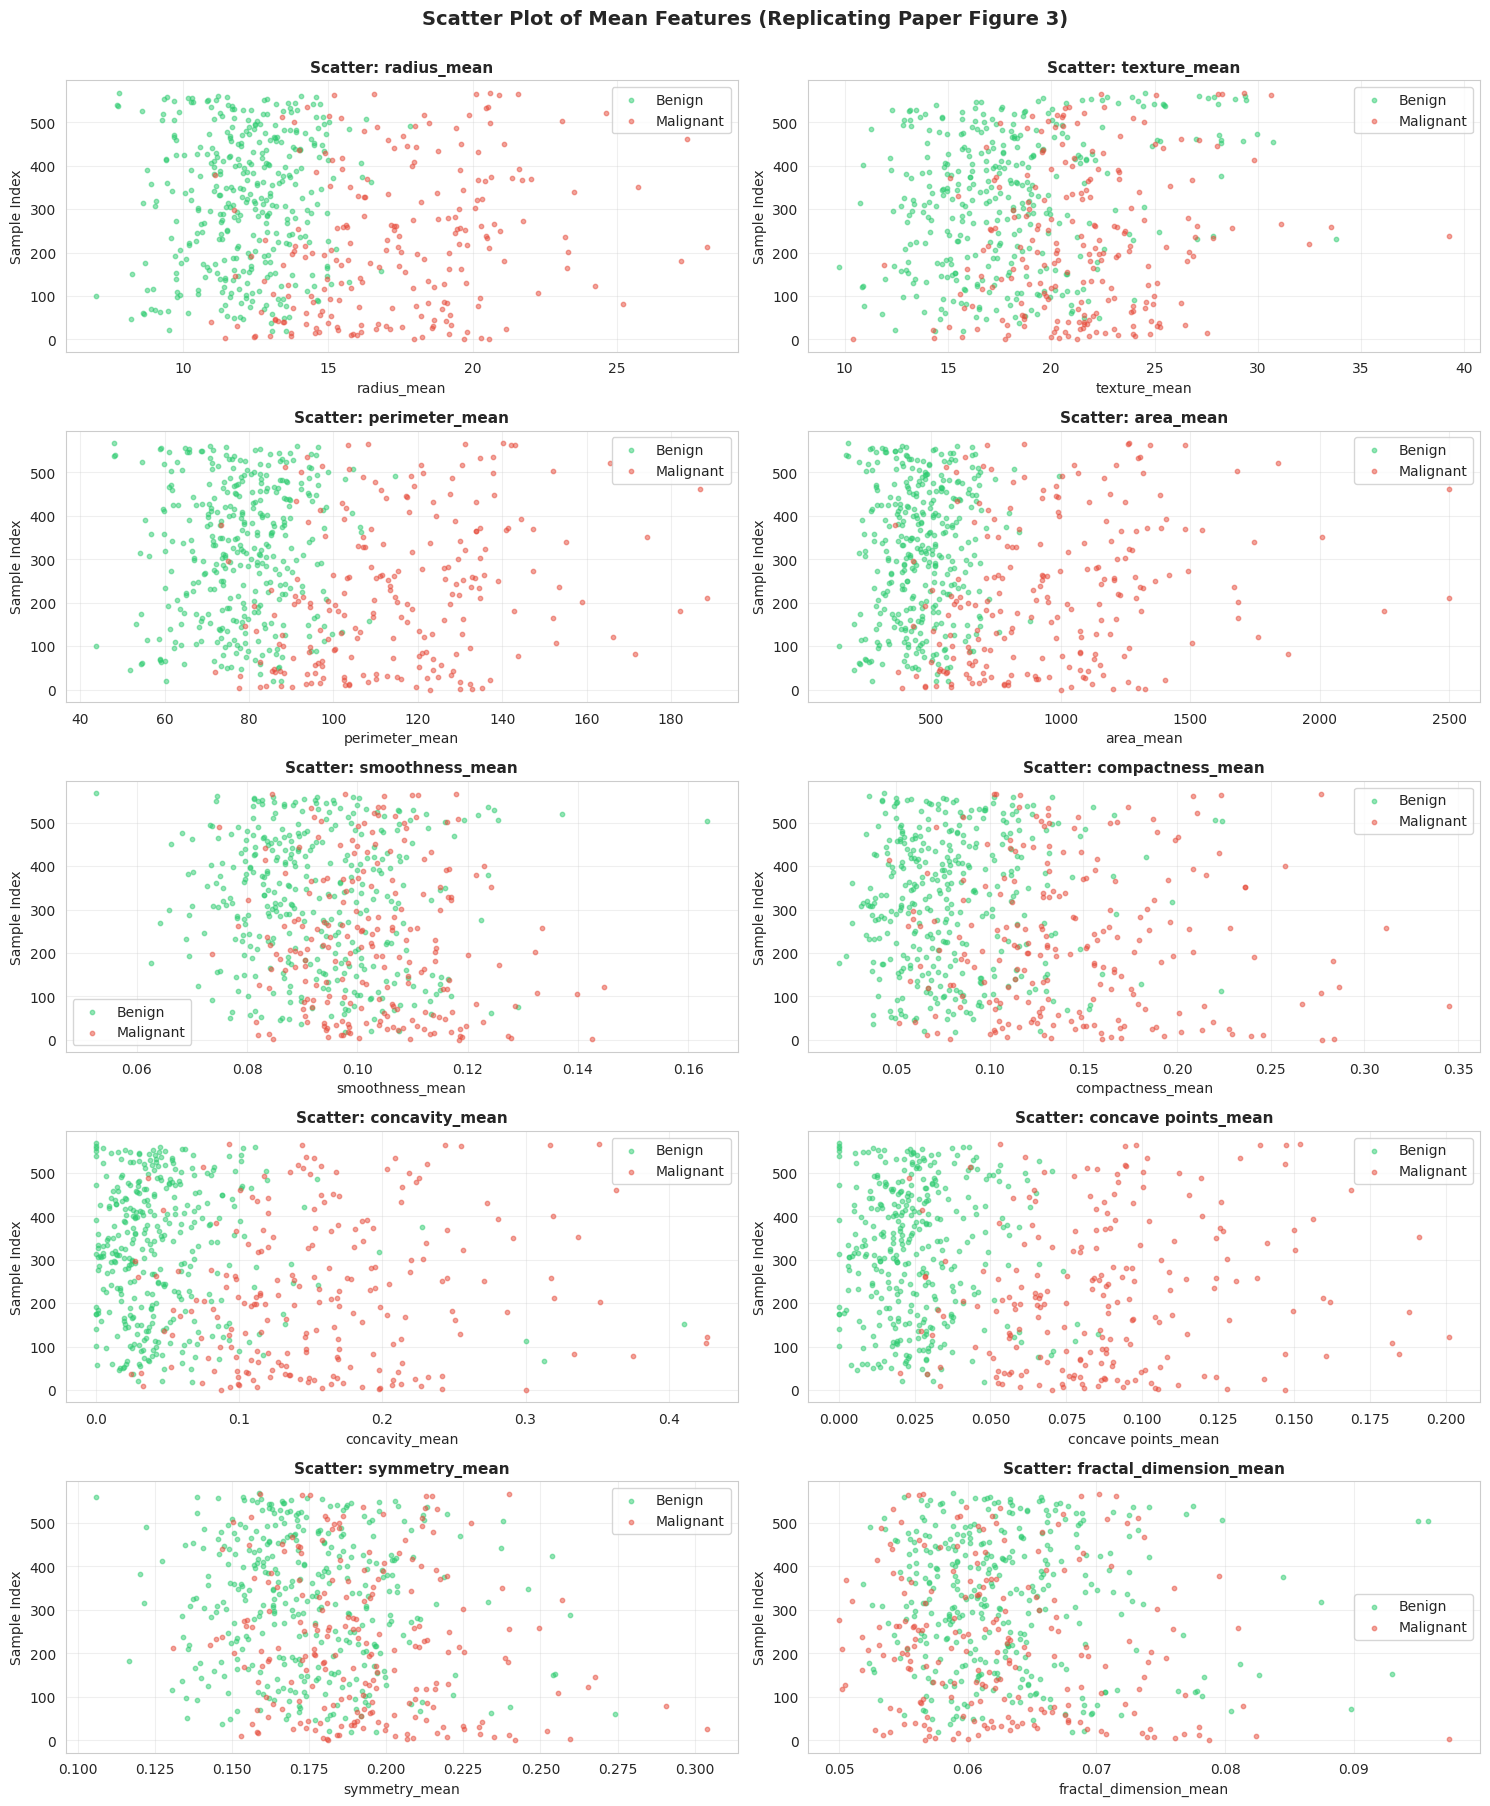

✓ Saved as 'scatter_mean_features.png'


In [11]:
# ============================================================================
#  EXPLORATORY DATA ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# 1 Distribution of Mean Features
print("\n[1/7] Creating distribution plots for mean features...")
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    axes[idx].hist(benign[col], bins=30, alpha=0.6, label='Benign', color='#2ecc71', edgecolor='black')
    axes[idx].hist(malignant[col], bins=30, alpha=0.6, label='Malignant', color='#e74c3c', edgecolor='black')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('mean_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'mean_features_distribution.png'")

# 2 Box plots for mean features
print("\n[2/7] Creating box plots for mean features...")
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    df.boxplot(column=col, by='diagnosis', ax=axes[idx])
    axes[idx].set_xlabel('Diagnosis (0=Benign, 1=Malignant)', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].set_title(f'Box Plot: {col}', fontsize=11, fontweight='bold')
    axes[idx].get_figure().suptitle('')

plt.tight_layout()
plt.savefig('mean_features_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'mean_features_boxplot.png'")

# 3 Correlation Matrix
print("\n[3/7] Creating correlation matrix...")
# Select only numeric columns (excluding diagnosis for now)
numeric_features = df.drop('diagnosis', axis=1)

plt.figure(figsize=(20, 16))
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix_full.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'correlation_matrix_full.png'")

# 4 Correlation with diagnosis
print("\n[4/7] Analyzing correlation with diagnosis...")
correlations_with_diagnosis = df.corr()['diagnosis'].drop('diagnosis').sort_values(ascending=False)

plt.figure(figsize=(12, 10))
correlations_with_diagnosis.plot(kind='barh', color='steelblue')
plt.xlabel('Correlation with Diagnosis', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Correlation with Diagnosis\n(Positive = Malignant, Negative = Benign)',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('correlation_with_diagnosis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'correlation_with_diagnosis.png'")

print("\nTop 10 features most correlated with Malignant diagnosis:")
print(correlations_with_diagnosis.head(10))

# 9.5 Scatter plots (replicating Figure 3, 4, 5 from paper)
print("\n[5/7] Creating scatter plots for feature categories...")

# Mean features scatter plot
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    axes[idx].scatter(benign[col], benign.index, alpha=0.5, s=10, c='#2ecc71', label='Benign')
    axes[idx].scatter(malignant[col], malignant.index, alpha=0.5, s=10, c='#e74c3c', label='Malignant')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Sample Index', fontsize=10)
    axes[idx].set_title(f'Scatter: {col}', fontsize=11, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Scatter Plot of Mean Features (Replicating Paper Figure 3)',
             fontsize=14, fontweight='bold', y=1.001)
plt.tight_layout()
plt.savefig('scatter_mean_features.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'scatter_mean_features.png'")



**3. Data Preparation**#

In [12]:

# Remove 'id' column as it's not relevant for classification
if 'id' in df.columns:
    df = df.drop('id', axis=1)
    print("\n✓ 'id' column removed")

# Remove 'Unnamed: 32' column if it exists (common in this dataset)
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)
    print("✓ 'Unnamed: 32' column removed")

print(f"\nDataset shape after cleaning: {df.shape}")


✓ 'id' column removed
✓ 'Unnamed: 32' column removed

Dataset shape after cleaning: (569, 31)


In [13]:
# 10. DATA NORMALIZATION
# ============================================================================
print("\n" + "="*80)
print("DATA NORMALIZATION")
print("="*80)

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Standardize features using StandardScaler (as mentioned in the paper)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print("\n✓ Features normalized using StandardScaler (mean=0, std=1)")
print("\nNormalized data statistics:")
print(X_normalized_df.describe())


DATA NORMALIZATION

Features shape: (569, 30)
Target shape: (569,)

✓ Features normalized using StandardScaler (mean=0, std=1)

Normalized data statistics:
        radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.373633e-16  6.868164e-17   -1.248757e-16 -2.185325e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17        -4.995028e-17

In [14]:
# 11. TRAIN-TEST SPLIT
# ============================================================================
print("\n" + "="*80)
print("TRAIN-TEST SPLIT")
print("="*80)

# Split data: 80% train, 20% test (paper used 70/30, but you specified 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.20, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples ({(X_train.shape[0]/len(df))*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({(X_test.shape[0]/len(df))*100:.1f}%)")

print(f"\nTraining set class distribution:")
print(f"  Benign: {(y_train == 0).sum()} samples")
print(f"  Malignant: {(y_train == 1).sum()} samples")

print(f"\nTesting set class distribution:")
print(f"  Benign: {(y_test == 0).sum()} samples")
print(f"  Malignant: {(y_test == 1).sum()} samples")


TRAIN-TEST SPLIT

Training set size: 455 samples (80.0%)
Testing set size: 114 samples (20.0%)

Training set class distribution:
  Benign: 285 samples
  Malignant: 170 samples

Testing set class distribution:
  Benign: 72 samples
  Malignant: 42 samples


In [15]:
# 12. SAVE PROCESSED DATA
# ============================================================================
print("\n" + "="*80)
print("SAVING PROCESSED DATA")
print("="*80)

# Save normalized data
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

print("\n✓ Data saved successfully:")
print("  - X_train.npy")
print("  - X_test.npy")
print("  - y_train.npy")
print("  - y_test.npy")

# Save feature names
feature_names = X.columns.tolist()
with open('feature_names.txt', 'w') as f:
    for feature in feature_names:
        f.write(f"{feature}\n")
print("  - feature_names.txt")

# Save scaler for future use
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("  - scaler.pkl")



SAVING PROCESSED DATA

✓ Data saved successfully:
  - X_train.npy
  - X_test.npy
  - y_train.npy
  - y_test.npy
  - feature_names.txt
  - scaler.pkl


In [16]:
# 13. SUMMARY REPORT
# ============================================================================
print("\n" + "="*80)
print("SUMMARY REPORT")
print("="*80)

summary_report = f"""
WISCONSIN DIAGNOSTIC BREAST CANCER DATASET - EDA REPORT
{'='*80}

1. DATASET OVERVIEW
   - Total samples: {df.shape[0]}
   - Total features: {df.shape[1] - 1} (after removing ID)
   - Classes: Binary (Benign=0, Malignant=1)

2. CLASS DISTRIBUTION
   - Benign (B): {diagnosis_counts['B']} samples ({diagnosis_percentages['B']:.2f}%)
   - Malignant (M): {diagnosis_counts['M']} samples ({diagnosis_percentages['M']:.2f}%)
   - Balance: {'Relatively balanced' if abs(diagnosis_percentages['B'] - diagnosis_percentages['M']) < 20 else 'Imbalanced'}

3. FEATURE CATEGORIES
   - Mean features: {len(mean_features)}
   - Standard Error features: {len(se_features)}
   - Worst features: {len(worst_features)}
   - Total: {len(mean_features) + len(se_features) + len(worst_features)} features

4. DATA QUALITY
   - Missing values: {'None' if len(missing_df) == 0 else f'{len(missing_df)} columns'}
   - Duplicates: {df.duplicated().sum()}
   - Data types: All numeric (after encoding)

5. DATA PREPROCESSING
   - Normalization: StandardScaler (mean=0, std=1)
   - Train-Test Split: {(X_train.shape[0]/len(df))*100:.0f}% / {(X_test.shape[0]/len(df))*100:.0f}%
   - Random State: 42 (for reproducibility)

6. KEY FINDINGS
   - Most correlated features with Malignant diagnosis:
{chr(10).join([f'     • {feat}: {correlations_with_diagnosis[feat]:.3f}' for feat in correlations_with_diagnosis.head(5).index])}

   - Least correlated features with Malignant diagnosis:
{chr(10).join([f'     • {feat}: {correlations_with_diagnosis[feat]:.3f}' for feat in correlations_with_diagnosis.tail(5).index])}

7. LINEAR SEPARABILITY
   - The dataset appears to be linearly separable based on visualization
   - This aligns with the paper's findings that linear classifiers performed well
   - Mean features show clear separation between benign and malignant cases

8. FILES GENERATED
   - Training data: X_train.npy, y_train.npy
   - Testing data: X_test.npy, y_test.npy
   - Scaler: scaler.pkl
   - Feature names: feature_names.txt
   - Visualizations:
     • class_distribution.png
     • mean_features_distribution.png
     • mean_features_boxplot.png
     • correlation_matrix_full.png
     • correlation_with_diagnosis.png
     • scatter_mean_features.png

9. NEXT STEPS (FOR OTHER TEAM MEMBERS)
   - Person 2-6: Load the processed data using:
     ```python
     X_train = np.load('X_train.npy')
     X_test = np.load('X_test.npy')
     y_train = np.load('y_train.npy')
     y_test = np.load('y_test.npy')
     ```
   - Implement ML algorithms: Linear Regression, MLP, Nearest Neighbor,
     Softmax Regression, SVM, GRU-SVM
   - Target: >90% test accuracy (paper achieved ~99% with MLP)

{'='*80}
Report generated successfully!
"""

print(summary_report)

# Save report to file
with open('EDA_REPORT.txt', 'w', encoding='utf-8') as f:
    f.write(summary_report)

print("\n✓ Complete EDA report saved as 'EDA_REPORT.txt'")

print("\n" + "="*80)
print("DATA PREPARATION & EDA COMPLETED SUCCESSFULLY!")
print("="*80)
print("\nYou can now share the processed data files with your team members.")
print("All visualizations and the detailed report are ready for your project submission.")


SUMMARY REPORT

WISCONSIN DIAGNOSTIC BREAST CANCER DATASET - EDA REPORT

1. DATASET OVERVIEW
   - Total samples: 569
   - Total features: 30 (after removing ID)
   - Classes: Binary (Benign=0, Malignant=1)

2. CLASS DISTRIBUTION
   - Benign (B): 357 samples (62.74%)
   - Malignant (M): 212 samples (37.26%)
   - Balance: Imbalanced

3. FEATURE CATEGORIES
   - Mean features: 10
   - Standard Error features: 10
   - Worst features: 10
   - Total: 30 features

4. DATA QUALITY
   - Missing values: 1 columns
   - Duplicates: 0
   - Data types: All numeric (after encoding)

5. DATA PREPROCESSING
   - Normalization: StandardScaler (mean=0, std=1)
   - Train-Test Split: 80% / 20%
   - Random State: 42 (for reproducibility)

6. KEY FINDINGS
   - Most correlated features with Malignant diagnosis:
     • concave points_worst: 0.794
     • perimeter_worst: 0.783
     • concave points_mean: 0.777
     • radius_worst: 0.776
     • perimeter_mean: 0.743
   
   - Least correlated features with Maligna

## SVM + KNN

In [20]:
# =============================
# 1. Entraîner SVM (linéaire + RBF) et KNN
# =============================
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Utiliser StratifiedKFold pour la validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Définir modèles de base
svc_linear = SVC(kernel='linear', probability=True, random_state=42)
svc_rbf    = SVC(kernel='rbf', probability=True, random_state=42)
knn_model  = KNeighborsClassifier()

# Stocker les modèles
models = {
    "SVM Linear": svc_linear,
    "SVM RBF": svc_rbf,
    "KNN": knn_model
}

print("Modèles définis avec succès : ", list(models.keys()))


Modèles définis avec succès :  ['SVM Linear', 'SVM RBF', 'KNN']
